# Model training

In this Notebook we'll train all models from the previously generated [features.csv](features.csv).

In [10]:
import pandas as pd

df_train = pd.read_csv('train.csv', index_col = 0)
df_test = pd.read_csv('test.csv', index_col = 0)

In [11]:
df_train.columns

Index(['accordion', 'banjo', 'bass', 'cello', 'clarinet', 'cymbals', 'drums',
       'flute', 'guitar', 'mallet_percussion', 'mandolin', 'organ', 'piano',
       'saxophone', 'synthesizer', 'trombone', 'trumpet', 'ukulele', 'violin',
       'voice', 'zcr_mean', 'zcr_std', 'sc_mean', 'sc_std', 'sb_mean',
       'sb_std', 'sr_mean', 'sr_std', 'mfcc1_mean', 'mfcc1std', 'mfcc2_mean',
       'mfcc2std', 'mfcc3_mean', 'mfcc3std', 'mfcc4_mean', 'mfcc4std',
       'mfcc5_mean', 'mfcc5std', 'mfcc6_mean', 'mfcc6std', 'mfcc7_mean',
       'mfcc7std', 'mfcc8_mean', 'mfcc8std', 'mfcc9_mean', 'mfcc9std',
       'mfcc10_mean', 'mfcc10std', 'mfcc11_mean', 'mfcc11std', 'mfcc12_mean',
       'mfcc12std', 'mfcc13_mean', 'mfcc13std'],
      dtype='object')

In [12]:
df_train.head()

,accordion,banjo,bass,cello,clarinet,cymbals,drums,flute,guitar,mallet_percussion,...,mfcc9_mean,mfcc9std,mfcc10_mean,mfcc10std,mfcc11_mean,mfcc11std,mfcc12_mean,mfcc12std,mfcc13_mean,mfcc13std
000046_3840,NaN,NaN,NaN,NaN,0.17105,NaN,NaN,0.0,NaN,NaN,...,166.07562,216.15845,158.76860,209.78517,151.586730,203.43971,144.20024,197.13676,136.57768,190.80775
000135_483840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,765.03280,495.68510,590.32880,558.75824,425.313660,616.81950,274.80215,663.55350,142.18160,694.35410
000139_119040,0.84485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,214.49968,316.38672,198.65715,314.67343,186.793670,313.87470,177.73270,313.87650,170.00764,313.99084
000141_153600,0.83820,NaN,NaN,NaN,0.17840,NaN,NaN,NaN,NaN,NaN,...,146.75562,140.59268,130.84398,137.76826,116.143745,135.27222,102.52170,133.01720,89.94732,130.88220
000144_30720,0.16215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,172.74915,268.45245,166.11035,266.88522,159.133510,265.19022,151.69370,263.76523,143.99810,262.70773


In [13]:
import numpy as np

instruments = ['accordion', 'banjo', 'bass', 'cello', 'clarinet',
       'cymbals', 'drums', 'flute', 'guitar', 'mallet_percussion', 'mandolin',
       'organ', 'piano', 'saxophone', 'synthesizer', 'trombone', 'trumpet',
       'ukulele', 'violin', 'voice']

article_instruments = ['flute', 'guitar', 'organ', 'piano', 'trumpet', 'voice']

features = ['zcr_mean', 'zcr_std', 'sc_mean',
       'sc_std', 'sb_mean', 'sb_std', 'sr_mean', 'sr_std', 'mfcc1_mean',
       'mfcc1std', 'mfcc2_mean', 'mfcc2std', 'mfcc3_mean', 'mfcc3std',
       'mfcc4_mean', 'mfcc4std', 'mfcc5_mean', 'mfcc5std', 'mfcc6_mean',
       'mfcc6std', 'mfcc7_mean', 'mfcc7std', 'mfcc8_mean', 'mfcc8std',
       'mfcc9_mean', 'mfcc9std', 'mfcc10_mean', 'mfcc10std', 'mfcc11_mean',
       'mfcc11std', 'mfcc12_mean', 'mfcc12std', 'mfcc13_mean', 'mfcc13std']

article_features = ['zcr_mean', 'sc_mean', 'sb_mean', 'sr_mean', 'mfcc1_mean',
       'mfcc2_mean', 'mfcc3_mean', 'mfcc4_mean', 'mfcc5_mean', 'mfcc6_mean',
       'mfcc7_mean', 'mfcc8_mean', 'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean',
       'mfcc12_mean', 'mfcc13_mean']

Add a new cell to make switching between article features and full OPENMIC dataset:

In [25]:
FEATURES = article_features
INSTRUMENTS = article_instruments

In [38]:
df_train['flute'].head()

000046_3840      0.0
000135_483840    NaN
000139_119040    NaN
000141_153600    NaN
000144_30720     NaN
Name: flute, dtype: float64

In [56]:
y_trial = {}

for index, row in df_train[INSTRUMENTS].iterrows():
        #print("Frame: \n", row)
        #print("Item: \n", index)
        for instrument, observation in row.items():
            y_trial[instrument] = observation
        break
y_trial

{'flute': 0.0,
 'guitar': nan,
 'organ': nan,
 'piano': nan,
 'trumpet': 0.0,
 'voice': nan}

In [67]:
# detta borde ju gå 
df_train[df_train['banjo'] >= 0.5].notna()['banjo'].head()

000504_203520    True
000606_15360     True
000725_445440    True
001658_65280     True
001703_130560    True
Name: banjo, dtype: bool

Nedanstående celler fungerar, men räknar med NaN...

In [79]:

X_train = np.array(df_train[FEATURES])
# TODO: forloop 
# fungerar, men tar den bort NaN?
y_train = {}
for instrument in INSTRUMENTS:
            y_train[instrument] = np.array(df_train[instrument] >= 0.5)


In [80]:
X_test = np.array(df_test[FEATURES])
# TODO: forloop 
# fungerar, men tar den bort NaN?
y_test = {}
for instrument in INSTRUMENTS:
            y_test[instrument] = np.array(df_test[instrument] >= 0.5)


Försöker lösa problemet här :(

In [91]:
X_train = np.array(df_train[FEATURES])
# TODO: forloop 
y_train = {}
for instrument in INSTRUMENTS:
    y_train[instrument] = np.array(df_train[df_train[instrument] >= 0.5].notna()[instrument])

for instrument in INSTRUMENTS:
    print(instrument, len(y_train[instrument]))

flute 472
guitar 852
organ 482
piano 885
trumpet 828
voice 764


In [90]:
X_test = np.array(df_test[FEATURES])
# TODO: forloop 
y_test = {}
for instrument in INSTRUMENTS:
    y_test[instrument] = np.array(df_test[df_test[instrument] >= 0.5].notna()[instrument])

for instrument in INSTRUMENTS:
    print(instrument, len(y_test[instrument]))

flute 175
guitar 286
organ 121
piano 285
trumpet 318
voice 224


# Training 

One main difference between the OpenMIC datset and IRMAS, is that OpenMIC has multilabel problemsn many cases. (A song can have multiple instrument classes assigned to it). In order to handle this we use train one binary classifier for each instrument. It's a naive approach and may be improved, but as beginning ML practioneers, it gives us some results. 

In [92]:
from sklearn.metrics import classification_report, confusion_matrix

instrument_dict = {
    'flute': None,
    'guitar': None,
    'organ': None,
    'piano': None,
    'trumpet': None,
    'voice': None
}

confusion_matrices = {
    'LogisticRegression': instrument_dict.copy(),
    'DecisionTree': instrument_dict.copy(),
    'LGBM': instrument_dict.copy(),
    'XGBoost': instrument_dict.copy(),
    'RandomForestClassifier': instrument_dict.copy(),
    'SVM': instrument_dict.copy()

}

def print_classification_report(y_true, y_pred, instrument, model):
    """
    Helper method to print classification report and store confusion matrix
    """
    print("##############################################")
    print("Classification report for {}".format(instrument))
    report = classification_report(y_true, y_pred)
    print(report)
    confusion_matrices[model][instrument] = confusion_matrix(y_true, y_pred)


I am storing all classifiers

In [18]:
clfs = {}

## Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

lr = {}

for instrument in article_instruments:
    clf = LogisticRegression(random_state=0, max_iter=50).fit(X_train, y_train[instrument])
    y_pred = clf.predict(X_test)
    print_classification_report(y_true=y_test[instrument], y_pred=y_pred, instrument=instrument, model='LogisticRegression')
    lr[instrument] = clf

clfs["Logistic Regression"] = lr

ValueError: Found input variables with inconsistent numbers of samples: [14915, 472]

## Decision Tree

In [106]:
print(X_train.shape)
len(y_train["piano"])

(14915, 17)


885

In [94]:
from sklearn import tree

dct = {}

for instrument in INSTRUMENTS:
    clf = tree.DecisionTreeClassifier().fit(X_train, y_train[instrument])
    y_pred = clf.predict(X_test)
    print_classification_report(y_true=y_test[instrument], y_pred=y_pred, instrument=instrument, model='DecisionTree')
    dct[instrument] = clf
    
clfs["Decision Tree"] = dct

ValueError: Number of labels=472 does not match number of samples=14915

## LGBM

## XG Boost

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## SVM

In [ ]:
## LGBM

In [ ]:
from sklearn.svm import SVC

clf = SVC()

clf.fit(X_train, y_train)

SVC()

In [ ]:
X_test = np.array(df_test[article_features])
y_test = np.array(df_test["drums"] >= 0.5)
y_pred = clf.predict(X_test)

ValueError: Must pass 2-d input. shape=()

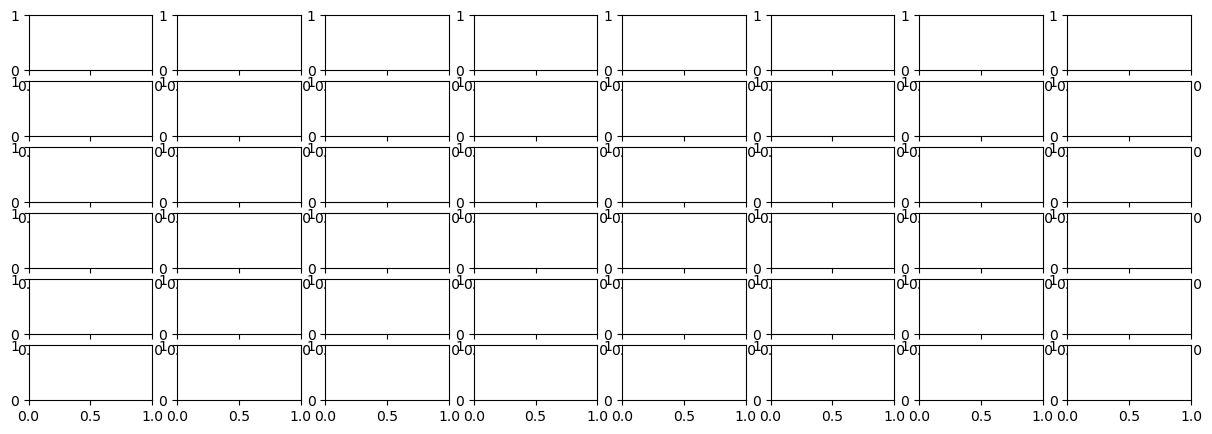

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#print(classification_report(y_true=y_test, y_pred=y_pred))
#cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, axes = plt.subplots(6, 8, figsize=(15, 5))


for i, model in enumerate(confusion_matrices):
    for j, instrument in enumerate(model):
        sns.heatmap(instrument, ax=axes[i, j])


In [104]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])

clf.predict_proba(X[:2, :])


clf.score(X, y)
print(len(X), len(y))
print(X)

150 150
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
